# Análisis Exploratorio - Tip

In [1]:
# librerías a usar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# Definimos los tipos de datos para cada columna
data_types = {
    'user_id': 'str',
    'business_id': 'str',
    'text': 'str',
    'date': 'str',  # luego se convertirá en tipo datetime 
    'compliment_count': int
}

In [3]:
# Especificamos un tamaño de chunk adecuado
chunk_size = 40000

# Creamos un objeto JsonReader
json_reader = pd.read_json('../../data/raw/Yelp/tip.json', lines=True, chunksize=chunk_size, dtype=data_types)


# Concatenamos los chunks en un solo DataFrame
df_tip = pd.concat((chunk for chunk in json_reader))

In [4]:
# Convertir la columna 'date' a datetime
df_tip['date'] = pd.to_datetime(df_tip['date'])

In [5]:
# Verificamos los tipos de datos
print(df_tip.dtypes)

user_id                     object
business_id                 object
text                        object
date                datetime64[ns]
compliment_count             int64
dtype: object


In [6]:
# Guardamos el DataFrame en formato Pickle para posteriores lecturas
df_tip.to_pickle('../../data/interim/Yelp/tip.pickle')

### **1. Exploración Inicial**

In [7]:
# Verificamos las dimensiones del dataframe
print("Dimensiones:", df_tip.shape)

Dimensiones: (908915, 5)


In [8]:
# Mostramos las primeras filas para confirmar la información del dataframe
df_tip.head(5)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


### **2. Análisis de Datos Cualitativos**

In [9]:
# Conteo de valores nulos
df_tip.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [10]:
# Estadísticas básicas de todas las variables
df_tip.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
user_id,908915,301758,fCvMnJU1Z-XhAjKg99wK3Q,4071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_id,908915,106193,FEXhWNCMkv22qG04E83Qjg,2571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
text,908915,851033,Great food,598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,908915,NaN,NaN,NaN,2015-06-14 10:13:53.302817280,2009-04-16 13:11:49,2013-01-26 01:18:02.500000,2015-03-15 01:10:25,2017-08-02 06:19:55.500000,2022-01-19 20:38:55,NaN
compliment_count,908915.0,NaN,NaN,NaN,0.012525,0.0,0.0,0.0,0.0,6.0,0.120763


In [11]:
# Valores únicos
print(df_tip.nunique())

user_id             301758
business_id         106193
text                851033
date                906694
compliment_count         7
dtype: int64


In [12]:
# Contar tips por mes
monthly_counts = df_tip.resample('M', on='date').count()
print(monthly_counts)

/var/folders/j1/pdsb5w0x52sgplylm6f7fmgm0000gn/T/ipykernel_2882/1543859096.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df_tip.resample('M', on='date').count()


            user_id  business_id  text  compliment_count
date                                                    
2009-04-30       47           47    47                47
2009-05-31       64           64    64                64
2009-06-30       72           72    72                72
2009-07-31       75           75    75                75
2009-08-31       92           92    92                92
...             ...          ...   ...               ...
2021-09-30     2708         2708  2708              2708
2021-10-31     2868         2868  2868              2868
2021-11-30     2785         2785  2785              2785
2021-12-31     1777         1777  1777              1777
2022-01-31      925          925   925               925

[154 rows x 4 columns]


In [13]:
# Promedio de conteo de cumplidos por mes
monthly_average = df_tip.resample('M', on='date')['compliment_count'].mean()
print(monthly_average)

/var/folders/j1/pdsb5w0x52sgplylm6f7fmgm0000gn/T/ipykernel_2882/1449627964.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average = df_tip.resample('M', on='date')['compliment_count'].mean()


date
2009-04-30    0.021277
2009-05-31    0.000000
2009-06-30    0.000000
2009-07-31    0.000000
2009-08-31    0.000000
                ...   
2021-09-30    0.001477
2021-10-31    0.001395
2021-11-30    0.001436
2021-12-31    0.003376
2022-01-31    0.007568
Freq: ME, Name: compliment_count, Length: 154, dtype: float64


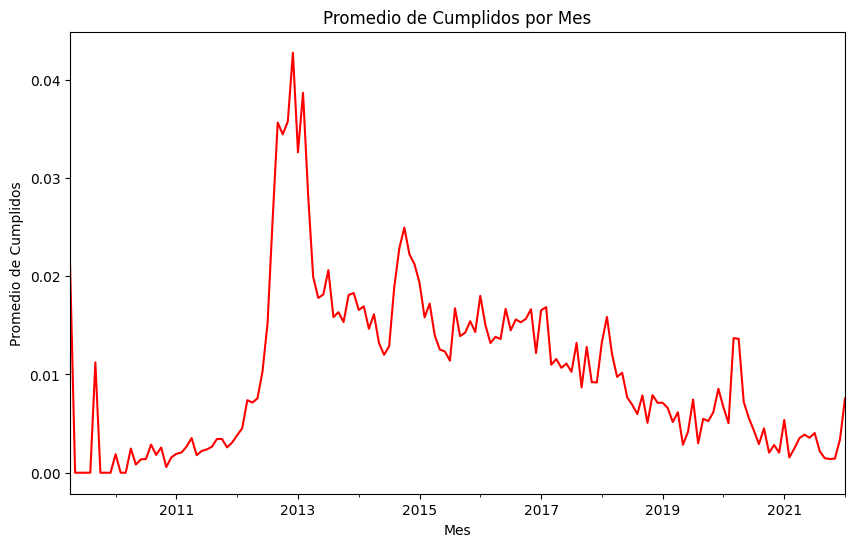

In [14]:
# Gráfico del promedio de cumplidos por mes
monthly_average.plot(kind='line', color='red', figsize=(10, 6))
plt.title('Promedio de Cumplidos por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Cumplidos')
plt.show()

/var/folders/j1/pdsb5w0x52sgplylm6f7fmgm0000gn/T/ipykernel_2882/2156364328.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_counts = df_tip.resample('Q', on='date')['text'].count()


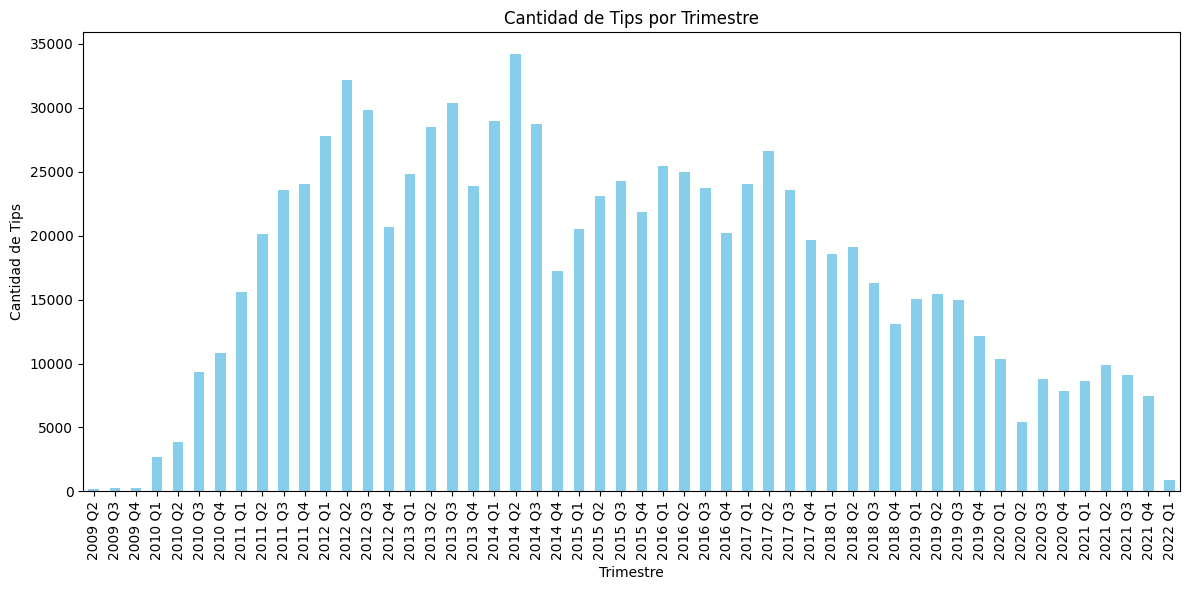

In [16]:
# Contamos los tips de cada trimestre
quarterly_counts = df_tip.resample('Q', on='date')['text'].count()

# Creamos la gráfica
plt.figure(figsize=(12, 6))
quarterly_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Tips por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad de Tips')

# Definimos una función para formatear la etiqueta de la fecha
def format_quarter_label(x):
    if not x: return ''
    q = (x.month - 1) // 3 + 1  # Calcula el trimestre
    return f'{x.year} Q{q}'

# Aplicamos la función a las etiquetas del eje x
labels = [format_quarter_label(x) for x in quarterly_counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)  # Asegúrate de rotar las etiquetas para mejor visualización
plt.tight_layout()
plt.show()

### **3. Análisis de Datos Cuantitativos**

#### 3.1. Distribuciones

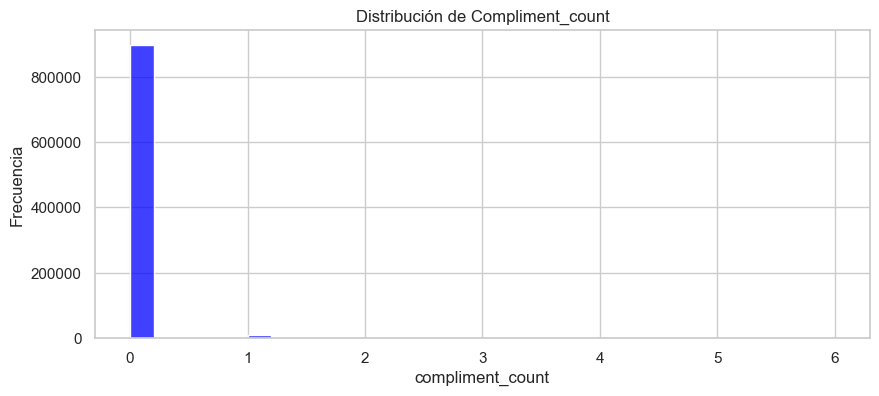

In [17]:
# Configuración para mejorar la estética de los gráficos
sns.set(style="whitegrid")

# Crear histogramas para la columna compliment_count

plt.figure(figsize=(10, 4))
sns.histplot(df_tip['compliment_count'], kde=False, bins=30, color='blue')
plt.title(f'Distribución de Compliment_count')
plt.xlabel('compliment_count')
plt.ylabel('Frecuencia')
plt.show()

In [23]:
column = 'compliment_count'
zero_count = (df_tip[column] == 0).sum()
total_count = df_tip[column].count()
zero_percentage = (zero_count / total_count) * 100
print(f'{column}: {zero_percentage:.2f}% de los valores son cero')

compliment_count: 98.84% de los valores son cero


#### 3.2. Correlaciones

Al tener una sola columna numérica no tiene sentido calcular correlaciones.

#### 3.3. Detección de outliers

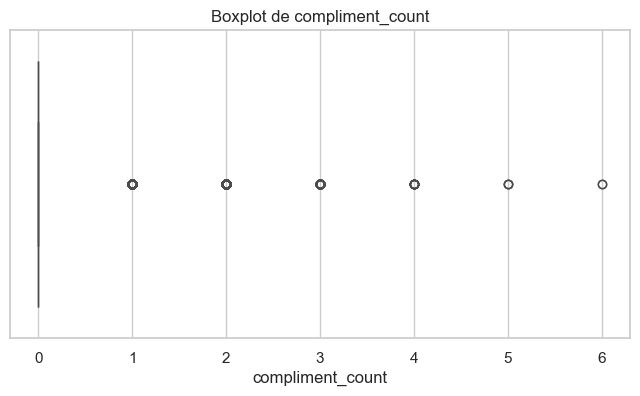

In [24]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_tip[column])
plt.title(f'Boxplot de {column}')
plt.show()

### **4. Análisis de Sentimiento Detallado**

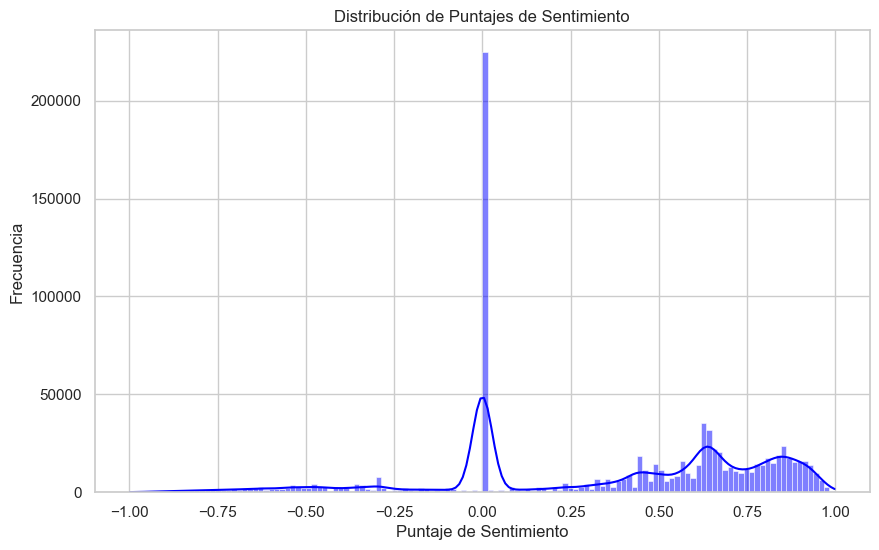

In [25]:
# Aplicamos el análisis de sentimiento usando VaderSentiment en el campo Text.
analyzer = SentimentIntensityAnalyzer()
df_tip['sentiment_score'] = df_tip['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Visualización de la distribución de los puntajes de sentimiento
plt.figure(figsize=(10, 6))
sns.histplot(df_tip['sentiment_score'], kde=True, color='blue')
plt.title('Distribución de Puntajes de Sentimiento')
plt.xlabel('Puntaje de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()